Downloading Important Libraries

In [2]:
!pip install requests beautifulsoup4 pandas

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import os

Scraping Data Code

In [4]:
CHARACTER_NAMES = ["Katniss_Everdeen", "Peeta_Mellark", "Gale_Hawthorne", "Effie_Trinket", "Finnick_Odair", "Johanna_Mason", "President_Coriolanus_Snow", "Alma_Coin"]  # List of character names
BASE_URL = "https://thehungergames.fandom.com/wiki/"

In [5]:
os.makedirs("data/raw", exist_ok=True) #Creating the directory if it doesn't exist

In [6]:
#Web scraping function to get character bios from the Hunger Games wiki
def scrape_character_bio(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the content div (specific to Fandom layout)
    content_div = soup.find("div", class_="mw-parser-output")
    if not content_div:
        print("Content not found")
        return []
    paragraphs = content_div.find_all("p")
    text_blocks = []

    for para in paragraphs:
        text = para.get_text().strip()
        if text and len(text) > 50:  # Filter out very short lines
            clean_text = re.sub(r'\[\d+\]', '', text)  # remove [1], [2], etc.
            text_blocks.append(clean_text)

    return text_blocks

In [7]:
#Saving the scraped data to a CSV file
def save_text_to_csv(text_list, filename):
    df = pd.DataFrame(text_list, columns=["paragraph"])
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f"✅ Saved {len(text_list)} paragraphs to {filename}")

In [8]:
#main function to iterate over character names and scrape their bios
def main():
    for character_name in CHARACTER_NAMES:
        full_url = BASE_URL + character_name
        print(f"Scraping data for {character_name.replace('_', ' ')}...")
        
        # Scrape data for each character
        data = scrape_character_bio(full_url)

        # If data is found, save it to CSV
        if data:
            output_path = f"data/raw/{character_name}.csv"
            save_text_to_csv(data, output_path)

if __name__ == "__main__":
    main()

Scraping data for Katniss Everdeen...
✅ Saved 117 paragraphs to data/raw/Katniss_Everdeen.csv
Scraping data for Peeta Mellark...
✅ Saved 89 paragraphs to data/raw/Peeta_Mellark.csv
Scraping data for Gale Hawthorne...
✅ Saved 61 paragraphs to data/raw/Gale_Hawthorne.csv
Scraping data for Effie Trinket...
✅ Saved 54 paragraphs to data/raw/Effie_Trinket.csv
Scraping data for Finnick Odair...
✅ Saved 52 paragraphs to data/raw/Finnick_Odair.csv
Scraping data for Johanna Mason...
✅ Saved 46 paragraphs to data/raw/Johanna_Mason.csv
Scraping data for President Coriolanus Snow...
✅ Saved 84 paragraphs to data/raw/President_Coriolanus_Snow.csv
Scraping data for Alma Coin...
✅ Saved 29 paragraphs to data/raw/Alma_Coin.csv


Sentiment Analysis

In [9]:
!pip install nltk vaderSentiment 
# Downloading nacessary packages

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon') # Downloading the VADER lexicon

[nltk_data] Downloading package vader_lexicon to d:\The Hunger Games
[nltk_data]     Saga\Panem\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# Function to analyze sentiment of text paragraphs
def analyze_sentiments(text_list):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Create a list to store sentiment results
    sentiments = []

    # Analyze sentiment for each paragraph
    for text in text_list:
        sentiment_score = sia.polarity_scores(text)
        sentiments.append(sentiment_score)
    
    return sentiments


In [11]:
os.makedirs("data/sentiments", exist_ok=True)

In [12]:
# Save Sentiments to CSV
def save_sentiments_to_csv(sentiments, filename):
    df = pd.DataFrame(sentiments)
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f"✅ Sentiments saved to {filename}")

In [13]:
# Main Function 
def main():
    for character_name in CHARACTER_NAMES:
        # Load the scraped data for each character
        scraped_data = pd.read_csv(f"data/raw/{character_name}.csv")
        paragraphs = scraped_data['paragraph'].tolist()

        # Perform sentiment analysis
        print(f"Analyzing sentiments for {character_name}...")
        sentiments = analyze_sentiments(paragraphs)

        # Save the sentiment analysis result
        save_sentiments_to_csv(sentiments, f"data/sentiments/{character_name}_sentiments.csv")

if __name__ == "__main__":
    main()

Analyzing sentiments for Katniss_Everdeen...
✅ Sentiments saved to data/sentiments/Katniss_Everdeen_sentiments.csv
Analyzing sentiments for Peeta_Mellark...
✅ Sentiments saved to data/sentiments/Peeta_Mellark_sentiments.csv
Analyzing sentiments for Gale_Hawthorne...
✅ Sentiments saved to data/sentiments/Gale_Hawthorne_sentiments.csv
Analyzing sentiments for Effie_Trinket...
✅ Sentiments saved to data/sentiments/Effie_Trinket_sentiments.csv
Analyzing sentiments for Finnick_Odair...
✅ Sentiments saved to data/sentiments/Finnick_Odair_sentiments.csv
Analyzing sentiments for Johanna_Mason...
✅ Sentiments saved to data/sentiments/Johanna_Mason_sentiments.csv
Analyzing sentiments for President_Coriolanus_Snow...
✅ Sentiments saved to data/sentiments/President_Coriolanus_Snow_sentiments.csv
Analyzing sentiments for Alma_Coin...
✅ Sentiments saved to data/sentiments/Alma_Coin_sentiments.csv


Work Frequency Analysis

In [14]:
# Importing necessary libraries for text analysis
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
# Display plots inline
%matplotlib inline

In [16]:
# Download NLTK data
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to d:\The Hunger Games
[nltk_data]     Saga\Panem\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to d:\The Hunger Games
[nltk_data]     Saga\Panem\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# List of characters
CHARACTER_NAMES = [
    "Katniss_Everdeen", "Peeta_Mellark", "Gale_Hawthorne", "Effie_Trinket",
    "Finnick_Odair", "Johanna_Mason", "President_Coriolanus_Snow", "Alma_Coin"
]

def simple_word_freq_analysis(text_list, character_name):
    # Join all text and tokenize
    text = " ".join(text_list).lower()
    words = word_tokenize(text)

    # Filter out stopwords and non-alphabetic words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

    # Get character's own name parts (e.g., "katniss", "everdeen")
    name_parts = character_name.lower().split("_")

    # Remove character name words
    filtered_words = [word for word in filtered_words if word not in name_parts]

    # Count word frequency
    word_freq = Counter(filtered_words)
    freq_df = pd.DataFrame(word_freq.most_common(15), columns=["Word", "Frequency"])

    # Print top words
    print(f"\nTop words for {character_name}:\n")
    print(freq_df)

    # Plot the word frequency
    plt.figure(figsize=(10, 6))
    plt.bar(freq_df["Word"], freq_df["Frequency"], color="teal")
    plt.title(f"Top 15 Words for {character_name}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Top words for Katniss_Everdeen:

          Word  Frequency
0        peeta        145
1     district         99
2      capitol         64
3         gale         60
4        games         48
5        tells         43
6     haymitch         37
7         prim         34
8          rue         31
9         back         30
10  mockingjay         29
11      hunger         28
12        snow         28
13         one         27
14     finnick         27


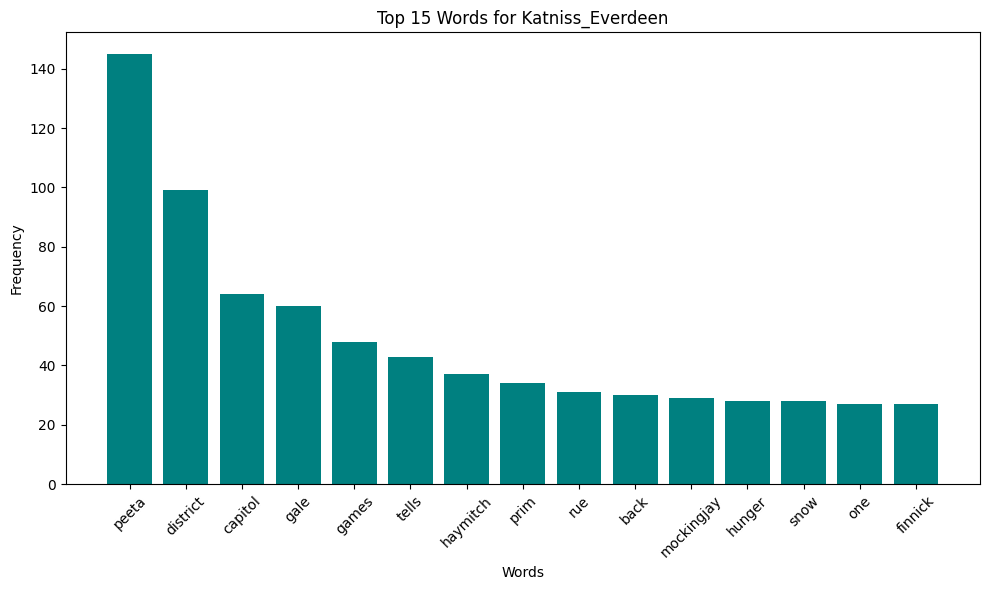


Top words for Peeta_Mellark:

        Word  Frequency
0    katniss        241
1   haymitch         53
2      games         46
3   district         40
4    capitol         34
5       gale         29
6    finnick         26
7     hunger         23
8       love         23
9      would         21
10    family         20
11     later         19
12       one         18
13       two         17
14  tributes         16


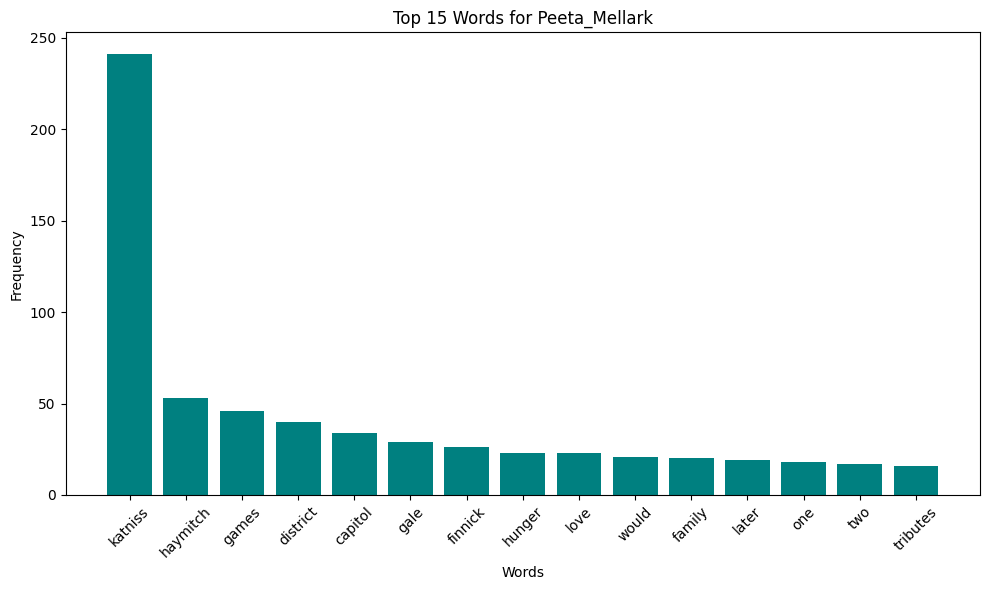


Top words for Gale_Hawthorne:

        Word  Frequency
0    katniss        167
1      peeta         61
2   district         41
3    capitol         24
4      woods         23
5      games         22
6     family         21
7       prim         20
8      later         18
9      tells         18
10    hunger         16
11    mother         15
12     would         15
13      time         13
14      snow         13


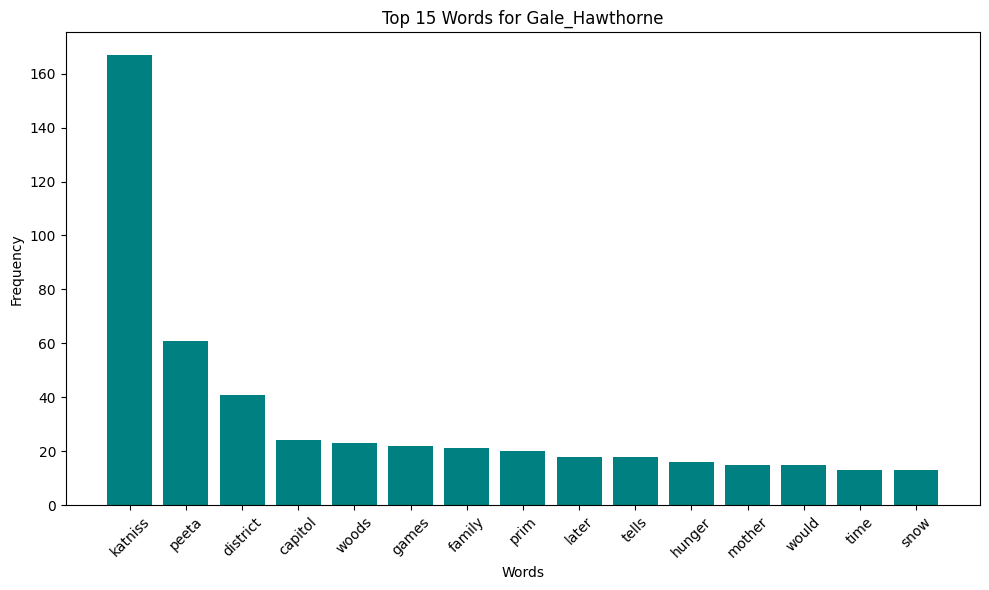


Top words for Effie_Trinket:

         Word  Frequency
0     katniss         76
1       peeta         40
2    haymitch         35
3       games         30
4     capitol         30
5    district         27
6      hunger         20
7     reaping         15
8     victory         12
9     manners         12
10        wig         11
11   tributes         10
12  president         10
13       tour          9
14      train          9


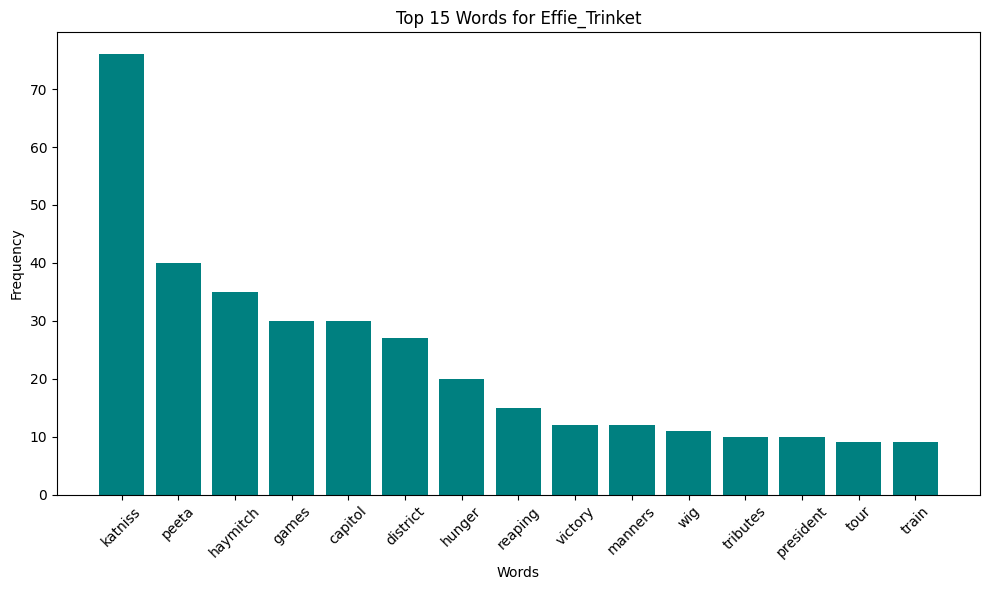


Top words for Finnick_Odair:

        Word  Frequency
0    katniss         98
1      peeta         55
2      annie         39
3      games         37
4   district         37
5       mags         27
6    capitol         25
7     hunger         22
8      later         18
9      would         17
10    victor         16
11   trident         15
12     could         15
13       one         13
14      snow         13


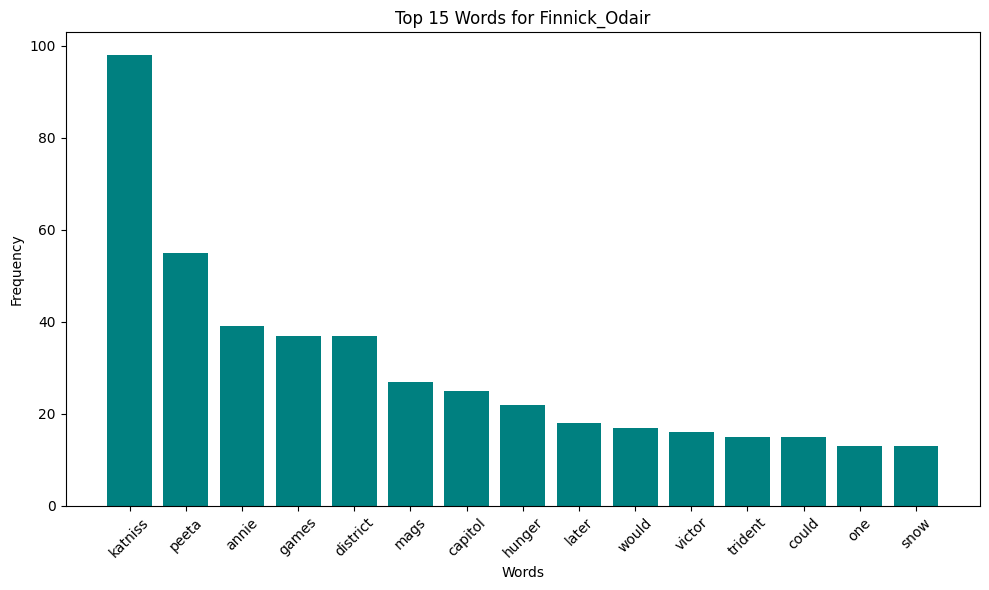


Top words for Johanna_Mason:

          Word  Frequency
0      katniss         67
1        peeta         23
2      finnick         21
3        games         20
4       hunger         18
5     district         18
6       beetee         17
7      capitol         16
8       wiress         14
9        later         12
10     victors         11
11    tributes         11
12        snow         10
13        also         10
14  mockingjay          8


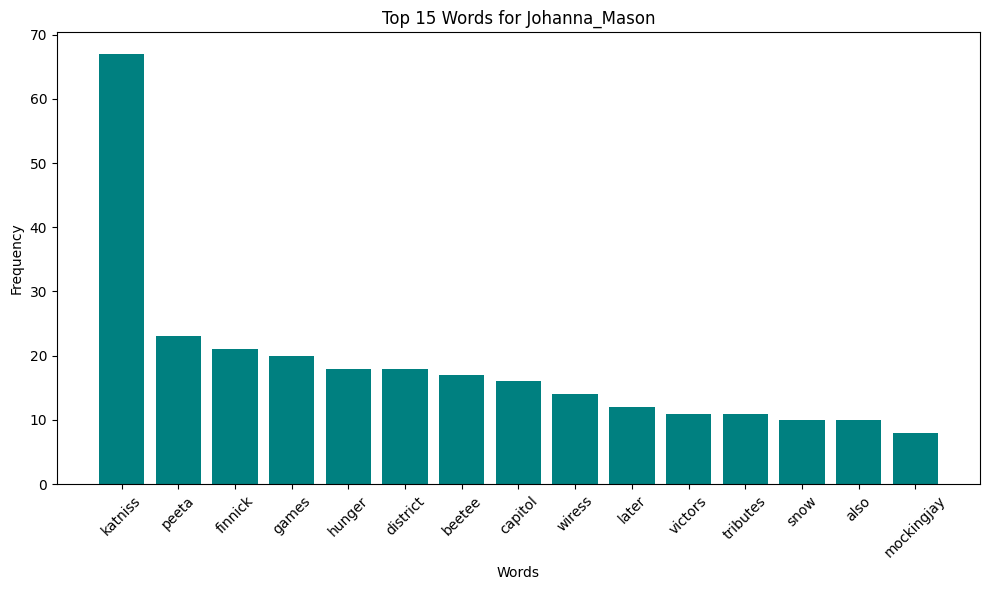


Top words for President_Coriolanus_Snow:

        Word  Frequency
0    katniss         65
1      games         56
2     hunger         48
3   haymitch         47
4       lucy         43
5    capitol         42
6     plinth         39
7       gray         36
8      would         35
9   district         33
10     could         30
11      gaul         28
12       one         26
13      also         25
14   however         23


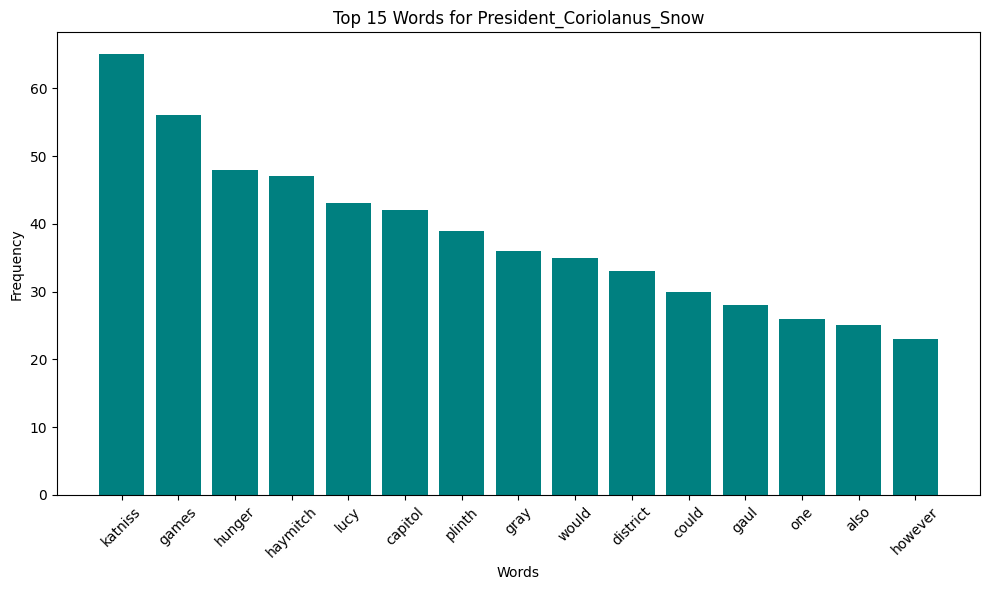


Top words for Alma_Coin:

          Word  Frequency
0      katniss         42
1     district         22
2      capitol         12
3         snow         12
4   mockingjay         11
5    president         10
6         part          9
7        would          9
8        games          8
9     plutarch          8
10       panem          7
11      hunger          7
12       first          7
13        gale          7
14       could          7


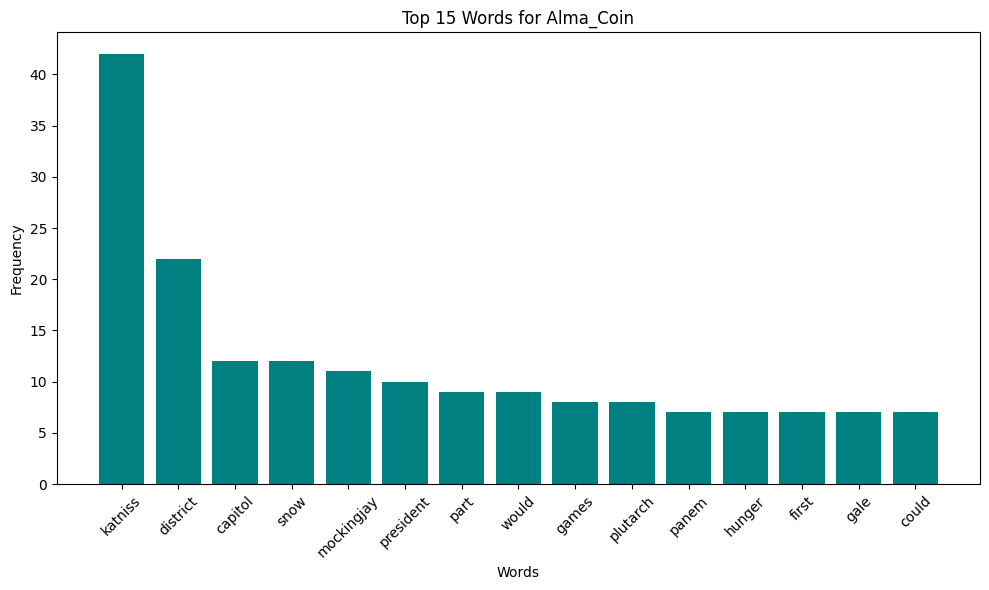

In [20]:
# Loop through all characters
for character_name in CHARACTER_NAMES:
    try:
        scraped_data = pd.read_csv(f"data/raw/{character_name}.csv")
        paragraphs = scraped_data['paragraph'].dropna().tolist()
        simple_word_freq_analysis(paragraphs, character_name)
    except FileNotFoundError:
        print(f"❌ File not found for {character_name}. Skipping...")
    except Exception as e:
        print(f"⚠️ Error processing {character_name}: {e}")
